# Name : Shubham Nagesh Gaikwad
# SUID : 216327540

## Project : Flower Data Analysis through AWS

In [164]:
# Importing Necessory Packages
import requests
import pandas as pd
import json
from tabulate import tabulate

In [165]:
# Package for AWS Connection
!pip install boto3

In [101]:
import boto3

In [166]:
# Creating AWS Connection
s3 = boto3.resource(
    service_name = 's3',
    region_name = 'us-east-2',
    aws_access_key_id = 'xxxxxxxxxxxxxxxx',
    aws_secret_access_key = 'xxxxxxxxxxxxx'
)

In [103]:
# Enlisting Bucket names in my service
for bucket in s3.buckets.all():
    print(bucket.name)

shubam0923project1
shubham0923project2


In [136]:
# Enlisting content of bucket
bucket = s3.Bucket('shubam0923project1')

# Listing all objects within the bucket
for obj in bucket.objects.all():
    print(obj.key)

Flower-Classes to Flower Names Dictionary.json
Flower_Price.json
datasource1.json
hindi_hits_from_1947_to_2022.json
hindi_hits_from_1947_to_2022_ai_enhanced.json
iris.json
iris_2.json


In [137]:

import boto3
import pandas as pd

# Initialize the S3 resource
s3 = boto3.resource(
    's3',
    region_name='us-east-2',
    aws_access_key_id='xxxxxxxx',
    aws_secret_access_key='AF9Raxxxxxxxxxxxxxxxxxxxxxxxx'
)

# Function to get content from files

def load_json_to_df(bucket_name, file_key):
    # Creating an S3 Object directly
    obj = s3.Object(bucket_name, file_key)
    
    # Get the file's content
    data = obj.get()['Body'].read().decode('utf-8')
    
    # Loading data into DataFrame
    try:
        df = pd.read_json(data, lines=True)
    except ValueError:
        df = pd.read_json(data)
    
    return df

# Specifying your bucket and file
bucket_name = 'shubam0923project1'
file_key = 'iris.json'
file_key2 = 'Flower_Price.json'

In [106]:
# Loading the JSON data into a DataFrame
df = load_json_to_df(bucket_name, file_key)

# Printing the first few rows of the DataFrame to verify
print(df.head())

   sepalLength  sepalWidth  petalLength  petalWidth species
0          5.1         3.5          1.4         0.2  setosa
1          4.9         3.0          1.4         0.2  setosa
2          4.7         3.2          1.3         0.2  setosa
3          4.6         3.1          1.5         0.2  setosa
4          5.0         3.6          1.4         0.2  setosa


C:\Users\shubham\AppData\Local\Temp\ipykernel_89588\2427734377.py:22: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_json(data, lines=True)
C:\Users\shubham\AppData\Local\Temp\ipykernel_89588\2427734377.py:25: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_json(data)


In [138]:
# Loading the JSON data into a DataFrame
df2 = load_json_to_df(bucket_name, file_key2)

# Printing the first few rows of the DataFrame to verify
print(df2.head())

      species  Price
0      setosa     56
1  versicolor     34
2   virginica     12


C:\Users\shubham\AppData\Local\Temp\ipykernel_89588\1497944103.py:22: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_json(data, lines=True)
C:\Users\shubham\AppData\Local\Temp\ipykernel_89588\1497944103.py:25: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_json(data)


In [108]:
# Converting to pandas dataframe
df3 = pd.DataFrame(df)

In [109]:
print(df3.head())

   sepalLength  sepalWidth  petalLength  petalWidth species
0          5.1         3.5          1.4         0.2  setosa
1          4.9         3.0          1.4         0.2  setosa
2          4.7         3.2          1.3         0.2  setosa
3          4.6         3.1          1.5         0.2  setosa
4          5.0         3.6          1.4         0.2  setosa


In [139]:
df4 = pd.DataFrame(df2)
print(df4.head())

      species  Price
0      setosa     56
1  versicolor     34
2   virginica     12


In [116]:
print(tabulate(df3.tail(5), headers='keys', tablefmt='psql'))

+-----+---------------+--------------+---------------+--------------+-----------+
|     |   sepalLength |   sepalWidth |   petalLength |   petalWidth | species   |
|-----+---------------+--------------+---------------+--------------+-----------|
| 145 |           6.7 |          3   |           5.2 |          2.3 | virginica |
| 146 |           6.3 |          2.5 |           5   |          1.9 | virginica |
| 147 |           6.5 |          3   |           5.2 |          2   | virginica |
| 148 |           6.2 |          3.4 |           5.4 |          2.3 | virginica |
| 149 |           5.9 |          3   |           5.1 |          1.8 | virginica |
+-----+---------------+--------------+---------------+--------------+-----------+


In [142]:
print(tabulate(df4.head(5), headers='keys', tablefmt='psql'))

+----+------------+---------+
|    | species    |   Price |
|----+------------+---------|
|  0 | setosa     |      56 |
|  1 | versicolor |      34 |
|  2 | virginica  |      12 |
+----+------------+---------+


# Data Cleaning And Preparation

In [168]:
# Check for missing values
print(df3.isnull().sum())

# Option 1: Fill missing values with the mean (for numerical columns) or mode (for categorical columns)
for column in df3.select_dtypes(include=['float', 'int']).columns:
    df3[column].fillna(df3[column].mean(), inplace=True)

for column in df3.select_dtypes(include=['object']).columns:
    df3[column].fillna(df3[column].mode()[0], inplace=True)


sepalLength        0
sepalWidth         0
petalLength        0
petalWidth         0
species            0
sepalLength_cat    0
dtype: int64


In [144]:
# Summarizing Numerical Data
summary_numeric_df3 = df3.describe()
summary_numeric_df4 = df4.describe() 

In [146]:
# Summarizing Categorical Data
summary_categorical_df3 = df3.describe(include=[object])
summary_categorical_df4 = df4.describe()

In [147]:
print("Summary of numeric columns in First File:")
print(summary_numeric_df3)
print("\nSummary of categorical columns in  First File:")
print(summary_categorical_df3)

print("\nSummary of numeric columns in Second File:")
print(summary_numeric_df4)
print("\nSummary of categorical columns in Second File:")
print(summary_categorical_df4)

Summary of numeric columns in First File:
       sepalLength  sepalWidth  petalLength  petalWidth
count   150.000000  150.000000   150.000000  150.000000
mean      5.843333    3.057333     3.758000    1.199333
std       0.828066    0.435866     1.765298    0.762238
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.350000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    2.500000

Summary of categorical columns in  First File:
       species
count      150
unique       3
top     setosa
freq        50

Summary of numeric columns in Second File:
       Price
count    3.0
mean    34.0
std     22.0
min     12.0
25%     23.0
50%     34.0
75%     45.0
max     56.0

Summary of categorical columns in Second File:
       Price
count    3.0
mean    34.0
std     22.0
min     12.0
25%     23.0
50%     34.0
75%     45.0
max     56.0


In [133]:
# Categorical Analysis

grouped_mean = df3.groupby('species').mean()

# Categorizing data based on some criteria; categorizing sepal length as 'short' or 'long'
df3['sepalLength_cat'] = pd.cut(df3['sepalLength'], bins=[0, 5.5, max(df3['sepalLength'])], labels=['short', 'long'])

# Statistics - aggregate counts of each category
sepal_length_distribution = df3['sepalLength_cat'].value_counts()

# More detailed statistics, grouping by the new category and species
detailed_stats = df3.groupby(['sepalLength_cat', 'species']).mean()

print("Grouped Means by Species:")
print(grouped_mean)
print("\nSepal Length Distribution:")
print(sepal_length_distribution)
print("\nDetailed Statistics by Sepal Length Category and Species:")
print(detailed_stats)

C:\Users\shubham\AppData\Local\Temp\ipykernel_89588\1712497034.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  detailed_stats = df3.groupby(['sepalLength_cat', 'species']).mean()


Grouped Means by Species:
            sepalLength  sepalWidth  petalLength  petalWidth
species                                                     
setosa            5.006       3.428        1.462       0.246
versicolor        5.936       2.770        4.260       1.326
virginica         6.588       2.974        5.552       2.026

Sepal Length Distribution:
sepalLength_cat
long     91
short    59
Name: count, dtype: int64

Detailed Statistics by Sepal Length Category and Species:
                            sepalLength  sepalWidth  petalLength  petalWidth
sepalLength_cat species                                                     
short           setosa         4.959574    3.387234     1.461702    0.242553
                versicolor     5.281818    2.463636     3.763636    1.172727
                virginica      4.900000    2.500000     4.500000    1.700000
long            setosa         5.733333    4.066667     1.466667    0.300000
                versicolor     6.120513    2.856410   

In [148]:
# Joining two dataframes
result_df = pd.merge(df4, df3, left_on='species', right_on='species', how='inner')

In [149]:
result_df.head(5)

,species,Price,sepalLength,sepalWidth,petalLength,petalWidth,sepalLength_cat
0,setosa,56,5.1,3.5,1.4,0.2,short
1,setosa,56,4.9,3.0,1.4,0.2,short
2,setosa,56,4.7,3.2,1.3,0.2,short
3,setosa,56,4.6,3.1,1.5,0.2,short
4,setosa,56,5.0,3.6,1.4,0.2,short


In [167]:
# Downloading Merged File

result_df.to_csv('FlowerDataMerged.csv', index=False)

# Exploratory Data Analysis

In [174]:
# Visualization for Data Analysis

import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# # Histograms for numerical data in df3
# df3_numeric = df3.select_dtypes(include=['float64', 'int64'])
# for column in df3_numeric.columns:
#     plt.figure(figsize=(10, 5))
#     sns.histplot(df3[column], kde=True)
#     plt.title(f'Histogram of {column} in df3')
#     plt.xlabel(column)
#     plt.ylabel('Frequency')
#     plt.show()

# # Box plots for numerical data in df4
# df4_numeric = df4.select_dtypes(include=['float64', 'int64'])
# for column in df4_numeric.columns:
#     plt.figure(figsize=(10, 5))
#     sns.boxplot(x=df4[column])
#     plt.title(f'Box plot of {column} in df4')
#     plt.xlabel(column)
#     plt.ylabel('Value')
#     plt.show()

# Scatter plot between two variables
if 'variable1' in df3.columns and 'variable2' in df3.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df3, x='variable1', y='variable2')
    plt.title('Scatter plot between variable1 and variable2 in df3')
    plt.xlabel('variable1')
    plt.ylabel('variable2')
    plt.show()


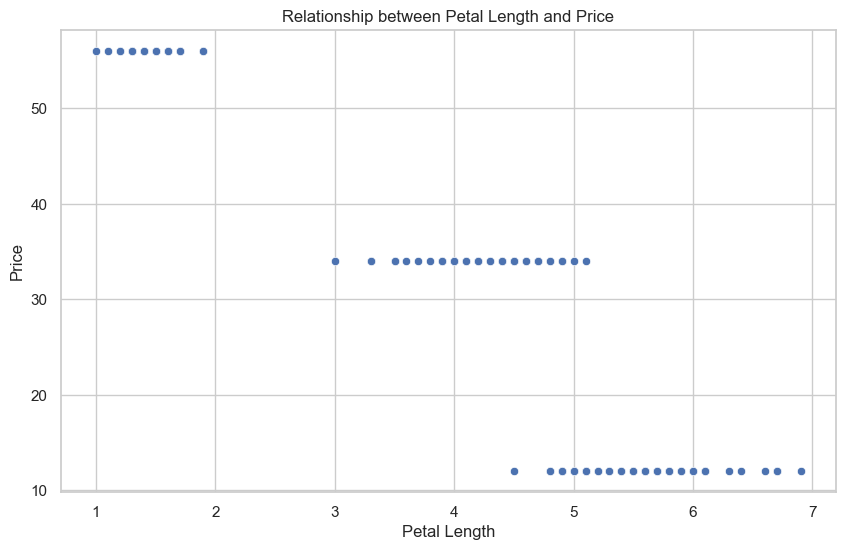

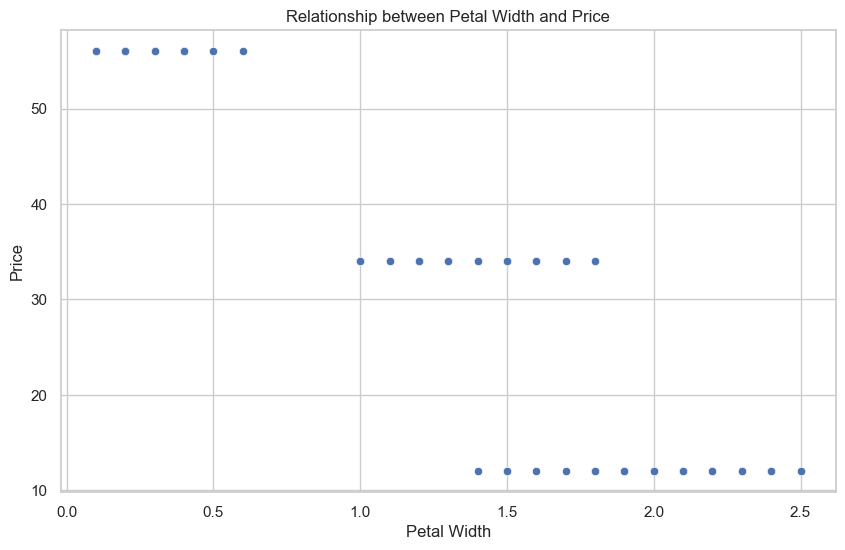

In [156]:
# Visualization to understand Relationships
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=result_df, x='petalLength', y='Price')
plt.title('Relationship between Petal Length and Price')
plt.xlabel('Petal Length')
plt.ylabel('Price')
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(data=result_df, x='petalWidth', y='Price')
plt.title('Relationship between Petal Width and Price')
plt.xlabel('Petal Width')
plt.ylabel('Price')
plt.show()



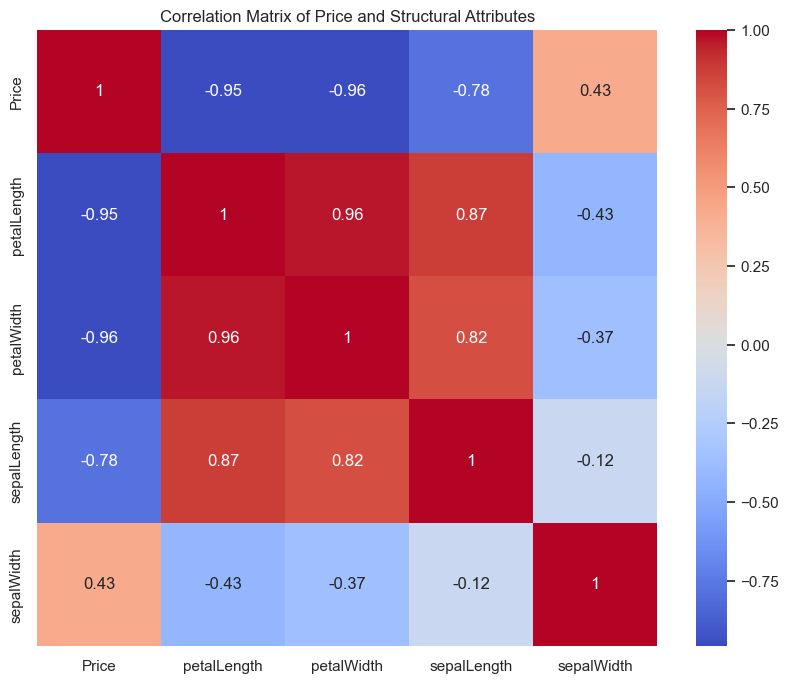

In [161]:
# Correlation Matrix - to understand the correlation in features

structural_attributes = ['Price', 'petalLength', 'petalWidth', 'sepalLength', 'sepalWidth']
correlation_matrix = result_df[structural_attributes].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Price and Structural Attributes')
plt.show()


In [163]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Preparing the data
X = result_df[['Price', 'petalLength', 'petalWidth', 'sepalLength', 'sepalWidth']]  # Predictor variables
y = result_df['Price']  # Response variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
print("Mean squared error: {:.2f}".format(mean_squared_error(y_test, y_pred)))
print("Coefficient of determination (R^2): {:.2f}".format(r2_score(y_test, y_pred)))


Mean squared error: 0.00
Coefficient of determination (R^2): 1.00
